In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
#there are 1338 rows and 7 columns

In [9]:
# checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
# there can be dulicated as people can have same age,same sex ,same bmi,etc

### univariate analysis

In [12]:
# age
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [13]:
df["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [14]:
df["age"]=df["age"].apply(lambda x:"young" if x<27 else "middle_aged" if x<39 else "older")

In [15]:
df["age"].unique()

array(['young', 'middle_aged', 'older'], dtype=object)

In [16]:
df["age"].value_counts()

age
older          689
young          334
middle_aged    315
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='count'>

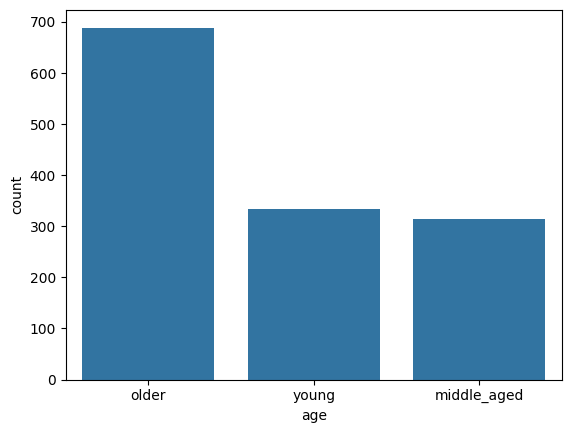

In [17]:
sns.barplot(df["age"].value_counts())

In [18]:
# maximum people are older

In [19]:
# sex
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [20]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

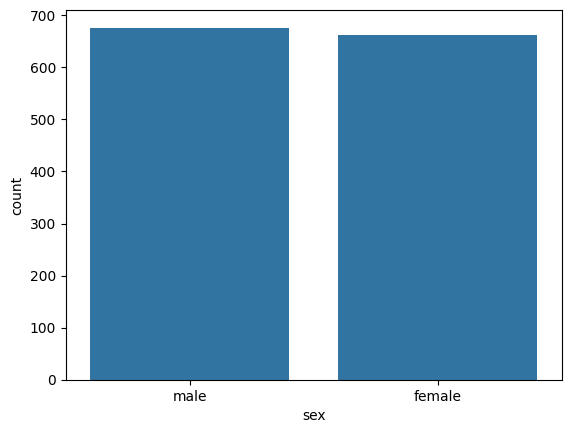

In [21]:
sns.barplot(df["sex"].value_counts())

In [22]:
print((662/1338)*100)

49.47683109118087


In [23]:
# 50.523 percent people are male while 49.476 percent are female

In [24]:
#Bmi
df['bmi'].unique()

array([27.9, 33.8, 33. , 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2,
       26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3, 36. , 32.4,
       34.1, 31.9, 28. , 23.1, 32.8, 17.4, 36.3, 35.6, 28.6, 28.3, 36.4,
       20.4, 20.8, 36.7, 39.9, 26.6, 36.6, 21.8, 37.1, 37.3, 38.7, 34.8,
       24.5, 35.2, 33.6, 28.7, 37. , 31.8, 31.7, 22.9, 27.4, 33.7, 24.7,
       25.9, 22.4, 39.1, 36.2, 24. , 24.8, 28.5, 28.1, 32. , 34. , 29.6,
       35.5, 26.9, 38.3, 37.6, 41.2, 31.2, 27.2, 27. , 39.5, 31.3, 20. ,
       19.3, 31.6, 25.5, 30.1, 29.9, 27.5, 28.4, 30.9, 35.1, 29.7, 35.7,
       32.2, 49.1, 23.4, 29. , 31.4, 33.9, 28.8, 37.4, 17.8, 34.7, 26.5,
       22. , 35.9, 25.6, 25.2, 32.5, 25.3, 38.8, 30.5, 37.7, 24.1, 24.4,
       27.8, 36.9, 39.6, 28.2, 33.2, 18.9, 41.5, 30.3, 16. , 33.3, 29.2,
       26.4, 30.7, 41.9, 32.1, 30.6, 18.1, 39.3, 36.1, 22.3, 26.7, 23.2,
       38.1, 22.2, 38.4, 29.1, 22.1, 26.8, 30. , 20.9, 17.3, 34.2, 25.4,
       40.2, 24.3, 42.4, 19.8, 30.2, 29.4, 27.6, 20

In [25]:
df["bmi"].describe()

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: ylabel='bmi'>

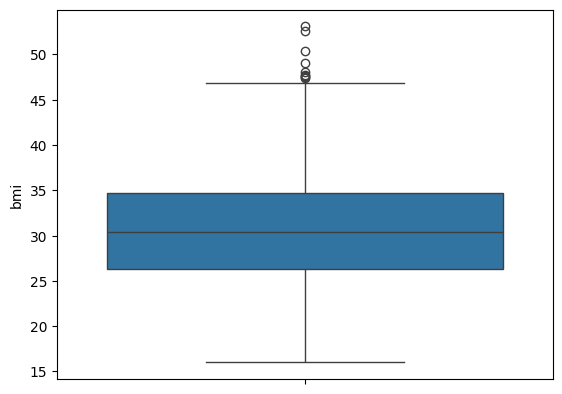

In [26]:
# since it is a numerical column,checking for outliers
sns.boxplot(df["bmi"])

In [27]:
# there are some outliers ,checking for gaussian
from scipy.stats import anderson
def gaussian_check(n):
    sns.distplot(n,kde=True)
    plt.show()
    stats.probplot(n,dist="norm",plot=plt)
    plt.show()
    y=anderson(n)
    print(y.statistic)
    print(y.critical_values)
    if y.statistic<y.critical_values[2]:
        return "gaussian"
    else:
        return "non-gaussian"
    

In [28]:
# checking for skewness
df["bmi"].skew()

0.28459296016731195

In [29]:
# slightly right skewed

In [30]:
#checking for kurtosis
df["bmi"].kurtosis()

-0.05337020602503051

In [31]:
# low peaked(fewer outliers)

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\967201698.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


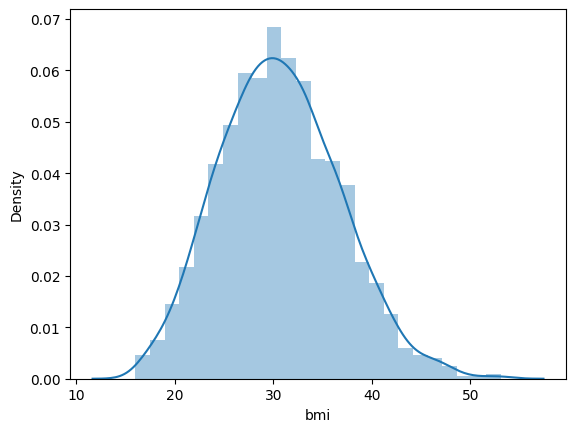

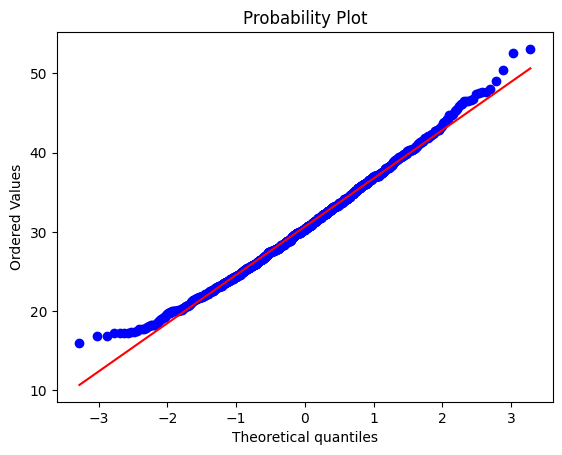

1.268242426748202
[0.574 0.654 0.785 0.915 1.089]


'non-gaussian'

In [32]:
gaussian_check(df["bmi"])

In [33]:
# since it is non- gaussian filling outliers with iqr
def Outliers_handle(n):
    q1=np.percentile(n,25)
    q3=np.percentile(n,75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    n[n<lb]=lb
    n[n>ub]=ub
    print("Outliers handled")

In [34]:
Outliers_handle(df["bmi"])

Outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_13940\478103721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_13940\478103721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [35]:
#children
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [36]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='count'>

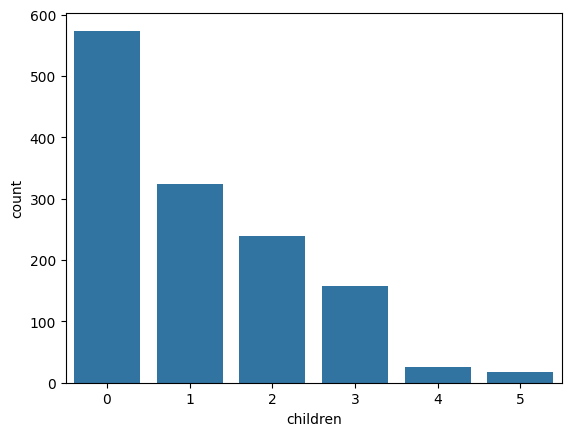

In [37]:
sns.barplot(df["children"].value_counts())

In [38]:
# maximum people dont have children

In [39]:
# smoker
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [40]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

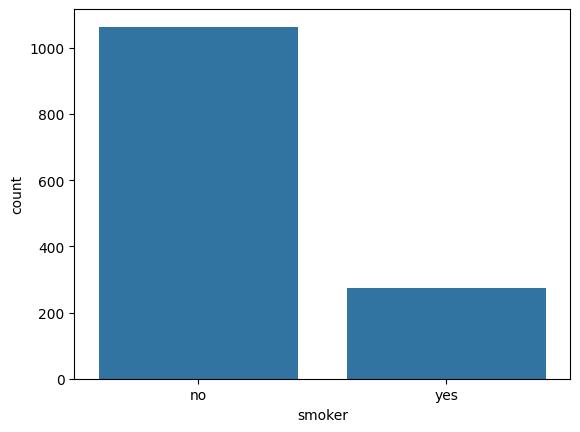

In [41]:
sns.barplot(df["smoker"].value_counts())

In [42]:
# maximum people dont smoke

In [43]:
# region
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [44]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

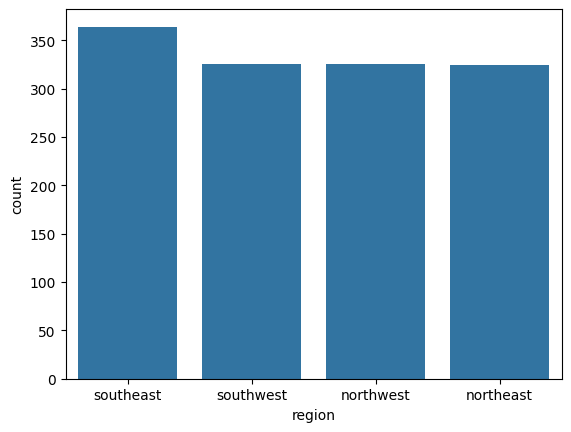

In [45]:
sns.barplot(df["region"].value_counts())

In [46]:
# maximum people stay in southeast region

In [47]:
#expenses
df["expenses"].unique()

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

<Axes: ylabel='expenses'>

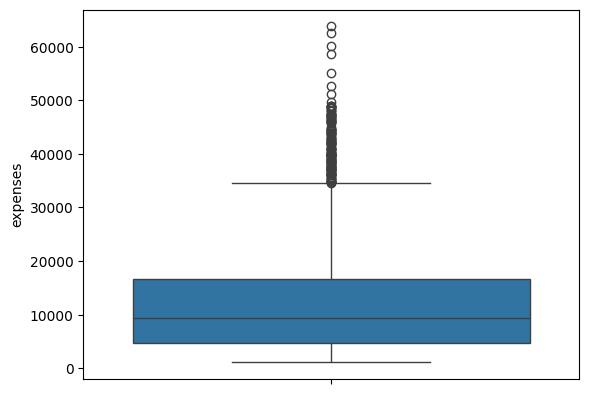

In [48]:
#checking for outliers
sns.boxplot(df["expenses"])


In [49]:
#checking for skewness
df["expenses"].skew()

1.51587966289798

In [50]:
# right skewd ,most of the data are present in the right region

In [51]:
df["expenses"].kurtosis()

1.6062986577747589

In [52]:
# more peaked ,more outliers

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\967201698.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


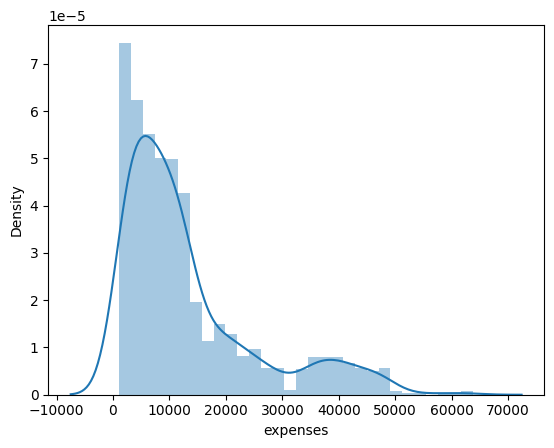

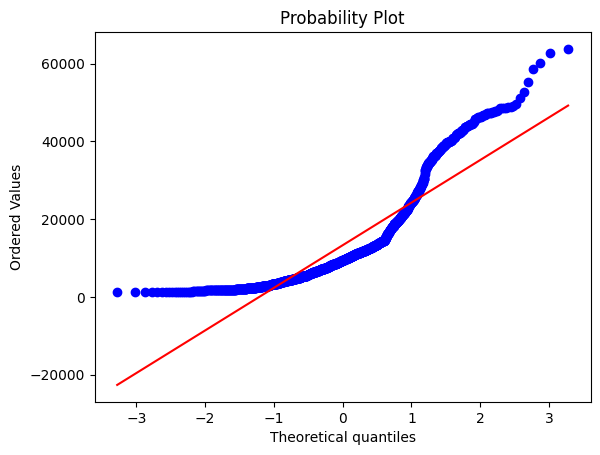

85.12851826701103
[0.574 0.654 0.785 0.915 1.089]


'non-gaussian'

In [53]:
# there are some outliers ,checking for gaussian
gaussian_check(df["expenses"])

In [54]:
# non gaussian so, filling outliers with iqr
Outliers_handle(df["expenses"])

Outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_13940\478103721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_13940\478103721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


### bivariate analysis

In [55]:
# checking if there is any relationship betn age and expenses
#categoriacal vs numerical
g1=df[df["age"]=="young"]["expenses"]
g2=df[df["age"]=="middle_aged"]["expenses"]
g3=df[df["age"]=="older"]["expenses"]

In [56]:
from scipy.stats import f_oneway
f_stats,p_value=f_oneway(g1,g2,g3)

In [57]:
p_value

2.726610754106609e-24

In [58]:
# less than 5% so the means of groups are independent 

In [59]:
# checking if there is any relationship betn sex and expenses
b1=df[df["sex"]=="male"]["expenses"]
b2=df[df["sex"]=="female"]["expenses"]

In [60]:
t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="two-sided")

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\3173784600.py:1: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="two-sided")


In [61]:
p

0.05569728017583117

In [62]:
# there is no significant difference b/w means of b1 and means of b2

In [63]:
t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="less")

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\2265901950.py:1: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="less")


In [64]:
p

0.9721513599120843

In [65]:
# mean of b1>=b2

In [66]:
t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="greater")

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\1840589537.py:1: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="greater")


In [67]:
p

0.027848640087915585

In [68]:
# mean of b1>b2

In [69]:
# checking if there is any relationship bmi and expenses
# numerical vs numerical ,applying correlation

In [70]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [71]:
correlation=df["bmi"].corr(df["expenses"])

In [72]:
correlation

0.16117118120383586

<Axes: xlabel='bmi', ylabel='expenses'>

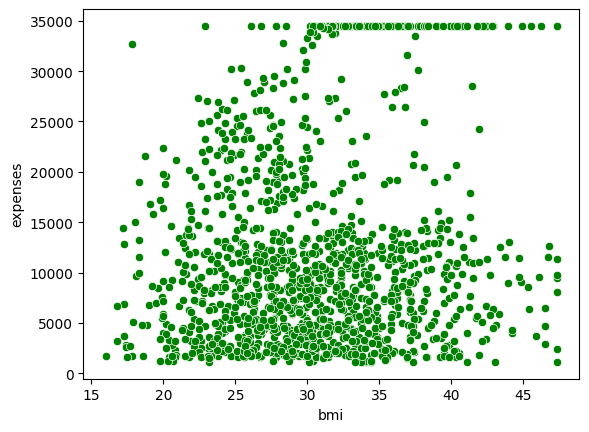

In [73]:
sns.scatterplot(x=df["bmi"],y=df["expenses"],color="green")

In [74]:
# it seems the are not much coreelated,most of the people's bmi fall betn 20-35 and there expenses are below 15000

In [75]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [76]:
# slightly positive linear relation

In [77]:
# checking if there is any relationship betn children and expenses
f1=df[df["children"]==0]["expenses"]
f2=df[df["children"]==1]["expenses"]
f3=df[df["children"]==2]["expenses"]
f4=df[df["children"]==3]["expenses"]
f5=df[df["children"]==4]["expenses"]
f6=df[df["children"]==5]["expenses"]

In [78]:
f_stat,p_value=f_oneway(f1,f2,f3,f4,f5,f6)

In [79]:
p_value

0.003855057270590227

In [80]:
# less than 5% there is significant difference betn their means

In [81]:
# checking if there is any relationship betn smoker and expenses
o1=df[df["smoker"]=="yes"]["expenses"]
o2=df[df["smoker"]=="no"]["expenses"]

In [82]:
t_stats,p=stats.stats.ttest_ind(o1,o2,alternative="less")

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\1680150509.py:1: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stats,p=stats.stats.ttest_ind(o1,o2,alternative="less")


In [83]:
p

1.0

In [84]:
# mean of o1 >= mean of o2

In [85]:
t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="greater")

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\1840589537.py:1: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stats,p=stats.stats.ttest_ind(b1,b2,alternative="greater")


In [86]:
p

0.027848640087915585

In [87]:
#less than 5% ,so mean of o1>mean of o2

In [88]:
t_stats,p=stats.stats.ttest_ind(o1,o2,alternative="two-sided")

C:\Users\pc\AppData\Local\Temp\ipykernel_13940\2614857226.py:1: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stats,p=stats.stats.ttest_ind(o1,o2,alternative="two-sided")


In [89]:
p

2.9289425520648834e-281

In [90]:
# less than 5% , so there is a significant difference betn means

In [91]:
#overall mean of o1>= mean of o2

In [92]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [93]:
#checking if there is any relationship betn region and expenses
u1=df[df["region"]=="southwest"]["expenses"]
u2=df[df["region"]=="southeast"]["expenses"]
u3=df[df["region"]=="northwest"]["expenses"]
u4=df[df["region"]=="northeast"]["expenses"]

In [94]:
f_stat,p_value=stats.f_oneway(u1,u2,u3,u4)

In [95]:
p_value

0.07041117519956074

In [96]:
# greater than 5% so the means of groups have no significant difference

### Multivariate analysis

In [97]:
df

,age,sex,bmi,children,smoker,region,expenses
0,young,female,27.9,0,yes,southwest,16884.92
1,young,male,33.8,1,no,southeast,1725.55
2,middle_aged,male,33.0,3,no,southeast,4449.46
3,middle_aged,male,22.7,0,no,northwest,21984.47
4,middle_aged,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,older,male,31.0,3,no,northwest,10600.55
1334,young,female,31.9,0,no,northeast,2205.98
1335,young,female,36.9,0,no,southeast,1629.83
1336,young,female,25.8,0,no,southwest,2007.95


In [98]:
df1=df.copy()

In [99]:
# converting all coolumns to numeric

In [100]:
df1["age"]=df1["age"].apply(lambda x:0 if x=="young" else "middle_aged" if x==1 else 2)
df1["sex"]=df1["sex"].apply(lambda x:0 if x=="male" else 1)
df1["smoker"]=df1["smoker"].apply(lambda x:0 if x=="no" else 1)
df1["region"]=df1["region"].apply(lambda x:0 if x=="southwest" else 1 if x=="southeast" else 2 if x=="northwest" else 3 )

In [101]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,0,1,27.9,0,1,0,16884.92
1,0,0,33.8,1,0,1,1725.55
2,2,0,33.0,3,0,1,4449.46
3,2,0,22.7,0,0,2,21984.47
4,2,0,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,2,0,31.0,3,0,2,10600.55
1334,0,1,31.9,0,0,3,2205.98
1335,0,1,36.9,0,0,1,1629.83
1336,0,1,25.8,0,0,0,2007.95


<Axes: >

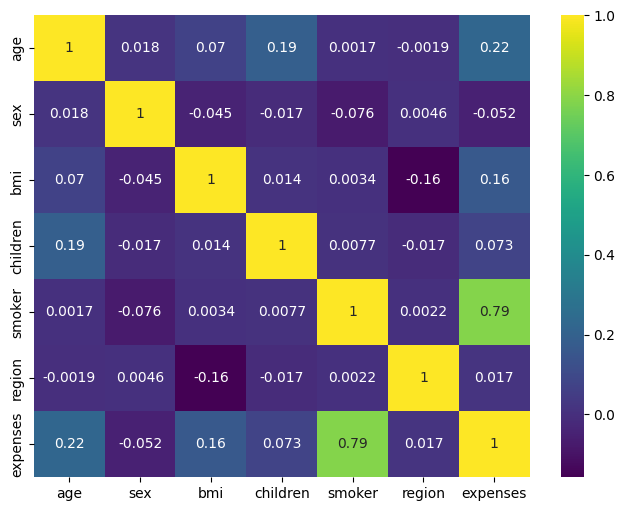

In [102]:
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,cmap="viridis")

In [103]:
# less correlated columns are
# sex
# children
# region
# correlated columns are 
# age
# smoker
# bmi
# most correlated column is smoker while least correlated is sex

In [104]:
x=df1.drop(columns=["expenses","children"])
y=df["expenses"]

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [107]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [108]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [109]:
lr.score(xtest,ytest)

0.7260799260185419

In [110]:
# applying lasso regression
from sklearn.linear_model import Lasso

In [111]:
lasso=Lasso(alpha=1.0)

In [112]:
lasso.fit(xtrain,ytrain)

Lasso()

In [113]:
y_pred=lasso.predict(xtest)

In [114]:
y_pred

array([25884.85955172,  7617.59728443, 29884.35930311,  9645.61663705,
       31072.17671692, 10401.58000239, 23665.81759208, 10029.9565088 ,
       10593.31999146,  4952.61443349,  8602.92143422,  9337.35045525,
        6973.75112874, 10014.5874398 , 30023.31623878,  5102.14562754,
        3442.44399503,  8513.23496749, 10836.94663532,  8253.34285601,
       14421.03682244, 10368.57500108,  4110.47718588,  9942.02633431,
        2930.10727354, 10681.25016596, 11222.18290569,  9502.25071831,
        1608.63830576,  8726.50930088, 28842.56049889, 27681.5828111 ,
        9744.12106993, 28923.93957054,  7103.32525415, 10032.60919965,
        9313.16342008, 24103.83691585,  7978.46750307,  9984.23512932,
        9612.61163573, 10652.65414771,  7998.24555516, 28967.90465778,
       27421.69069962, 10667.63738918, 11509.77463679, 10546.70221337,
        9641.20765397, 25579.24606076, 31962.68803485, 27685.99179417,
       12602.60020218, 10526.92416128,  9916.08300691, 10786.81627276,
      

In [115]:
# feature selection

In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [117]:
df2=df1.copy()

In [118]:
x1=df1.drop(columns="expenses")
y1=df1["expenses"]

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)

In [120]:
x_new_train=sc.fit_transform(x_train)
x_new_test=sc.fit_transform(x_test)

In [121]:
from sklearn.linear_model import Ridge

In [122]:
from sklearn.feature_selection import SequentialFeatureSelector

In [123]:
Rid=Ridge(alpha=0.1)

In [124]:
sfs=SequentialFeatureSelector(Rid,n_features_to_select=3,scoring="r2",direction="forward",cv=5)

In [125]:
sfs.fit(x_new_train,y_train)

SequentialFeatureSelector(estimator=Ridge(alpha=0.1), n_features_to_select=3,
                          scoring='r2')

In [126]:
indices_feature=sfs.get_support(indices=True)

In [127]:
lst=[]
for i in indices_feature:
    lst.append(x1.columns[i])

In [128]:
lst

['age', 'bmi', 'smoker']

In [129]:
# these are the features which are most important for model

In [130]:
#Hyperparameter tuning

In [131]:
from sklearn.model_selection import GridSearchCV
Param_grid={'alpha': [0.1, 1.0, 10.0]}
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gr=GridSearchCV(estimator=Rid,param_grid=Param_grid,scoring='r2',cv=kf)

In [132]:
gr.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(alpha=0.1), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='r2')

In [133]:
gr.best_params_

{'alpha': 0.1}

In [134]:
gr.best_score_

0.6772097434470083

In [135]:
para_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [False, True]
}


In [136]:
gr1=GridSearchCV(estimator=lr,param_grid=para_grid,scoring='r2',cv=5)

In [137]:
gr1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [False, True]},
             scoring='r2')

In [138]:
gr1.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': True}

In [139]:
gr1.best_score_

0.6806504313193075